# Limpieza y aumentado de datos


Esto documento describe el trabajo realizado para generar los datasets que se estudiaron, basado en información scrapeada de preciosclaros y otros obtenidos de otras fuente (fabricantes, rubros de productos)


In [1]:
import pandas as pd

In [2]:
precios_abril = pd.read_csv('datasets/precios_2018-04-20.csv')
precios_mayo = pd.read_csv('datasets/precios_2018-05-22.csv')
precios_abril.count(), precios_mayo.count(), 

/home/tin/.virtualenvs/curso/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(sucursal_id    6447954
 precio         6447954
 producto_id    6447954
 dtype: int64, producto_id    6071219
 precio         6071219
 sucursal_id    6071219
 dtype: int64)

In [3]:
precios_abril.head()

,sucursal_id,precio,producto_id
0,9-2-12,27.39,7790080065107
1,9-2-12,22.45,7790080065183
2,9-2-12,22.99,7791337651227
3,9-2-12,40.00,7791337690820
4,9-2-12,27.39,7790080065121


In [7]:
cruce = pd.merge(precios_abril, precios_mayo, on=['producto_id', 'sucursal_id'], suffixes=('_abril', '_mayo'))
cruce = cruce[['producto_id', 'sucursal_id', 'precio_abril', 'precio_mayo']]
cruce.head()

,producto_id,sucursal_id,precio_abril,precio_mayo
0,7790080065183,9-2-12,22.45,22.45
1,7791337651227,9-2-12,22.99,23.99
2,7791337690820,9-2-12,40.00,40.00
3,7790080065152,9-2-12,19.99,19.99
4,7790080065169,9-2-12,19.99,19.99


Calculamos el % de aumento

In [8]:
cruce['aumento'] = (cruce['precio_mayo'] - cruce['precio_abril']) * 100 / cruce['precio_abril']
cruce.head()

,producto_id,sucursal_id,precio_abril,precio_mayo,aumento
0,7790080065183,9-2-12,22.45,22.45,0.000000
1,7791337651227,9-2-12,22.99,23.99,4.349717
2,7791337690820,9-2-12,40.00,40.00,0.000000
3,7790080065152,9-2-12,19.99,19.99,0.000000
4,7790080065169,9-2-12,19.99,19.99,0.000000


Algunas estadísticas de aumentos

In [9]:
cruce.aumento.describe()

count    4.352889e+06
mean     3.758325e+00
std      1.075918e+01
min     -9.774306e+01
25%      0.000000e+00
50%      0.000000e+00
75%      7.142857e+00
max      2.403759e+03
Name: aumento, dtype: float64

In [10]:
import numpy as np
cruce.aumento.quantile(np.linspace(.1, 1, 9, 0))

0.1     0.000000
0.2     0.000000
0.3     0.000000
0.4     0.000000
0.5     0.000000
0.6     1.017187
0.7     5.093772
0.8     9.090909
0.9    13.207925
Name: aumento, dtype: float64

In [11]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb17601518>]], dtype=object)

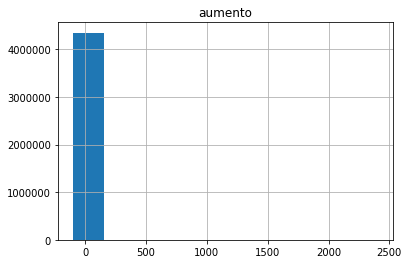

In [12]:
cruce.hist('aumento')

Obtengo un dataset sin extremos

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb0dd57e80>]], dtype=object)

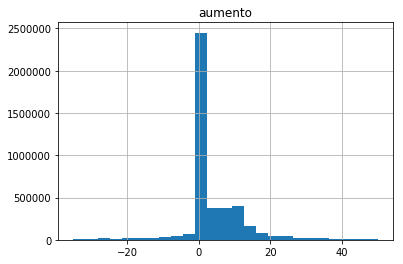

In [13]:
cruce_sin_extremos = cruce.loc[(cruce.aumento >= -35) & (cruce.aumento <= 50)]
cruce_sin_extremos.hist('aumento', bins=25)

preparo un frame de sucursales para tener detalles

In [56]:
sucs = pd.read_csv('datasets/sucursales.csv', usecols=['provincia','sucursalId', 'comercioId', 'banderaId'])
sucs['sucursal_id'] = sucs.apply(lambda x: f"{x['comercioId']}-{x['banderaId']}-{x['sucursalId']}", axis=1)
cadenas = pd.read_csv('datasets/cadenas.csv', usecols=['comercioId', 'banderaId', 'comercioRazonSocial', 'banderaDescripcion'])
cadenas.rename(dict(zip(cadenas.columns[-2:], ['empresa', 'cadena'])), inplace=True)
sucs = pd.merge(sucs, cadenas, on=['comercioId', 'banderaId'])
sucs.drop(['sucursalId', 'comercioId', 'banderaId'], axis=1)
sucs.head()

,provincia,sucursalId,comercioId,banderaId,sucursal_id,comercioRazonSocial,banderaDescripcion
0,AR-C,916,9,2,9-2-916,Jumbo Retail Argentina S.A.,Disco
1,AR-C,137,9,2,9-2-137,Jumbo Retail Argentina S.A.,Disco
2,AR-C,107,9,2,9-2-107,Jumbo Retail Argentina S.A.,Disco
3,AR-C,16,9,2,9-2-16,Jumbo Retail Argentina S.A.,Disco
4,AR-C,39,9,2,9-2-39,Jumbo Retail Argentina S.A.,Disco


In [57]:
# from https://es.wikipedia.org/wiki/ISO_3166-2:AR
text = """
AR-A	Salta
AR-B	Provincia de Buenos Aires
AR-C	Ciudad Autónoma de Buenos Aires
AR-D	San Luis
AR-E	Entre Ríos
AR-F	La Rioja
AR-G	Santiago del Estero
AR-H	Chaco
AR-J	San Juan
AR-K	Catamarca
AR-L	La Pampa
AR-M	Mendoza
AR-N	Misiones
AR-P	Formosa
AR-Q	Neuquén
AR-R	Río Negro
AR-S	Santa Fe
AR-T	Tucumán
AR-U	Chubut
AR-V	Tierra del Fuego
AR-W	Corrientes
AR-X	Córdoba
AR-Y	Jujuy
AR-Z	Santa Cruz
"""
from io import StringIO
sucs = pd.merge(sucs, cods, left_on='provincia', right_on='codigo')
sucs.drop(['provincia', 'sucursalId', 'comercioId', 'banderaId', 'codigo'], axis=1, inplace=True)
sucs.rename(columns=dict(comercioRazonSocial='empresa', banderaDescripcion='cadena', prov='provincia'), inplace=True)
sucs.head()


,sucursal_id,empresa,cadena,provincia
0,9-2-916,Jumbo Retail Argentina S.A.,Disco,Ciudad Autónoma de Buenos Aires
1,9-2-137,Jumbo Retail Argentina S.A.,Disco,Ciudad Autónoma de Buenos Aires
2,9-2-107,Jumbo Retail Argentina S.A.,Disco,Ciudad Autónoma de Buenos Aires
3,9-2-16,Jumbo Retail Argentina S.A.,Disco,Ciudad Autónoma de Buenos Aires
4,9-2-39,Jumbo Retail Argentina S.A.,Disco,Ciudad Autónoma de Buenos Aires


y ahora cruzo los datos via sucursal_id

In [58]:
con_sucursales = pd.merge(cruce_sin_extremos, sucs, on='sucursal_id')
con_sucursales.head()

,producto_id,sucursal_id,precio_abril,precio_mayo,aumento,empresa,cadena,provincia
0,7790080065183,9-2-12,22.45,22.45,0.000000,Jumbo Retail Argentina S.A.,Disco,Ciudad Autónoma de Buenos Aires
1,7791337651227,9-2-12,22.99,23.99,4.349717,Jumbo Retail Argentina S.A.,Disco,Ciudad Autónoma de Buenos Aires
2,7791337690820,9-2-12,40.00,40.00,0.000000,Jumbo Retail Argentina S.A.,Disco,Ciudad Autónoma de Buenos Aires
3,7790080065152,9-2-12,19.99,19.99,0.000000,Jumbo Retail Argentina S.A.,Disco,Ciudad Autónoma de Buenos Aires
4,7790080065169,9-2-12,19.99,19.99,0.000000,Jumbo Retail Argentina S.A.,Disco,Ciudad Autónoma de Buenos Aires


Ahora detalles de productos

In [61]:
prods = pd.read_csv('datasets/productos.csv')
prods.head()

,nombre,marca,id,presentacion
0,Yogur Entero Firme Frutado Multinutrientes San...,YOGS,7790080065107,180.0 gr
1,Yogur Entero Firme Frutilla Sancor Yogs Pack 2...,YOGS,7790080065183,250.0 gr
2,Yogur Entero Firme Frutilla Yogurisimo 190 Gr,YOGURISIMO,7791337651227,190.0 gr
3,Yogur Entero Firme Frutilla Yogurisimo 4 Un 50...,YOGURISIMO,7791337690820,500.0 gr
4,Yogur Entero Firme Multinutrientes Frambuesa M...,YOGS,7790080065121,180.0 gr


Tengo otros datasets del proyecto preciosa para aumentar detalles de marcas de productos: fabricante y categoria. 

La estructura de datos de Preciosa era más compleja y tenia categorias de productos con un gran detalle de subcategorias. El modelo está basado en [django-treebeard](http://django-treebeard.readthedocs.io/en/latest/). Nosotros necesitamos aplanar el arbol para usar categorias más generales. 

In [66]:
categorias = pd.read_csv('datasets/preciosa_categoria.csv')
categorias.head()

,id,path,depth,numchild,nombre,oculta,busqueda
0,2,0003,1,23,Almacen,f,almacen
1,3,00030001,2,6,Aceites,f,almacen aceites
2,4,00030002,2,4,Aceitunas y encurtidos,f,almacen aceitunas y encurtidos
3,5,00030003,2,6,Arroz,f,almacen arroz
4,6,00030004,2,2,Azucar y edulcorante,f,almacen azucar y edulcorante


In [89]:
fino = pd.merge(pd.read_csv('datasets/preciosa_productos.csv', usecols=['upc', 'categoria_id']), categorias[['id', 'path']], left_on='categoria_id', right_on='id')
fino['cat_principal'] = fino.path.str[:4]   
fino['cat_secundaria'] = fino.path.str[:8]   
fino.drop(['categoria_id', 'id', 'path'], axis=1, inplace=True)
con_principal = pd.merge(fino, categorias[['path', 'nombre']], left_on='cat_principal', right_on='path').drop('cat_principal', axis=1).rename(columns={'nombre': 'cat_principal'})
con_secundaria = pd.merge(con_principal, categorias[['path', 'nombre']], left_on='cat_secundaria', right_on='path').drop(['path_x', 'path_y', 'cat_secundaria'], axis=1).rename(columns={'nombre': 'cat_secundaria'})
con_secundaria.head()


,upc,cat_principal,cat_secundaria
0,693149611142,Automotor,Accesorios
1,779725000223,Automotor,Accesorios
2,779725000224,Automotor,Accesorios
3,693149773301,Automotor,Accesorios
4,693149864321,Automotor,Accesorios


In [92]:
con_secundaria.upc = con_secundaria.upc.astype(str)

In [140]:
prods_con_categoria = pd.merge(prods, con_secundaria, how='left', left_on='id', right_on='upc').drop('upc', axis=1)
prods_con_categoria

,nombre,marca,id,presentacion,cat_principal,cat_secundaria
0,Yogur Entero Firme Frutado Multinutrientes San...,YOGS,7790080065107,180.0 gr,NaN,NaN
1,Yogur Entero Firme Frutilla Sancor Yogs Pack 2...,YOGS,7790080065183,250.0 gr,NaN,NaN
2,Yogur Entero Firme Frutilla Yogurisimo 190 Gr,YOGURISIMO,7791337651227,190.0 gr,NaN,NaN
3,Yogur Entero Firme Frutilla Yogurisimo 4 Un 50...,YOGURISIMO,7791337690820,500.0 gr,NaN,NaN
4,Yogur Entero Firme Multinutrientes Frambuesa M...,YOGS,7790080065121,180.0 gr,NaN,NaN
5,Yogur Entero Firme Multinutrientes Frutal Sanc...,YOGS,7790080065152,190.0 gr,NaN,NaN
6,Yogur Entero Firme Multinutrientes Vainilla Sa...,YOGS,7790080065169,190.0 gr,NaN,NaN
7,Yogur Entero Firme Vainilla Sancor Yogs Pack 2...,YOGS,7790080065190,250.0 gr,NaN,NaN
8,Yogur Entero Firme Vainilla Yogurisimo 190 Gr,YOGURISIMO,7791337601215,190.0 gr,NaN,NaN
9,Yogur Entero Fortificado Vainilla Yogurisimo P...,YOGURISIMO,7791337690813,500.0 gr,NaN,NaN


In [141]:
categorias = prods_con_categoria.cat_principal.drop_duplicates()[1:]
categorias

18                      Almacen
38                   Perfumeria
59          Bebidas sin alcohol
73                     Limpieza
215                     Lacteos
340         Bebidas con alcohol
903                  Fiambreria
1009             Pastas y tapas
1322                 Congelados
1573              Mamas y bebes
2439     Golosinas y galletitas
5249                   Farmacia
5330                   Mascotas
6386                  Panaderia
11301         Frutas y verduras
Name: cat_principal, dtype: object

Como vemos, el cruce arrojo pocas coincidencias, es decir, que nos quedan muchisimos productos sin clasificar por categoria. Voy a hacer una inferencia baado en la categorización de productos conocidos. 

La idea es la siguiente:
 
 - obtengo la primer palabra del nombre de cada producto asociado a una categoria principal conocida. Ejemplo, para "Lacteos" arrojará ('Yogur', 'Leche', 'Manteca', ... )  
 - luego filtro productos no categorizados que comiencen con alguna de esas palabras y asigno la categoria


In [142]:
for cat in categorias[::-1]:
    descriptores = tuple(prods_con_categoria.loc[prods_con_categoria.cat_principal == cat].nombre.str.partition(' ')[0].drop_duplicates().tolist())
    prods_con_categoria.loc[prods_con_categoria.nombre.str.startswith(descriptores) & prods_con_categoria.cat_principal.isnull(), 'cat_principal'] = cat


In [154]:
prods_con_categoria.rename(columns={'id': 'producto_id'}, inplace=True)

In [155]:
prods_con_categoria.head()

,nombre,marca,producto_id,presentacion,cat_principal,cat_secundaria
0,Yogur Entero Firme Frutado Multinutrientes San...,YOGS,7790080065107,180.0 gr,Lacteos,NaN
1,Yogur Entero Firme Frutilla Sancor Yogs Pack 2...,YOGS,7790080065183,250.0 gr,Lacteos,NaN
2,Yogur Entero Firme Frutilla Yogurisimo 190 Gr,YOGURISIMO,7791337651227,190.0 gr,Lacteos,NaN
3,Yogur Entero Firme Frutilla Yogurisimo 4 Un 50...,YOGURISIMO,7791337690820,500.0 gr,Lacteos,NaN
4,Yogur Entero Firme Multinutrientes Frambuesa M...,YOGS,7790080065121,180.0 gr,Lacteos,NaN


In [157]:

data = pd.merge(con_sucursales, prods_con_categoria[['producto_id', 'marca', 'cat_principal']], on='producto_id')
data.head()

,producto_id,sucursal_id,precio_abril,precio_mayo,aumento,empresa,cadena,provincia,marca,cat_principal
0,7790080065183,9-2-12,22.45,22.45,0.0,Jumbo Retail Argentina S.A.,Disco,Ciudad Autónoma de Buenos Aires,YOGS,Lacteos
1,7790080065183,9-2-12,22.45,22.45,0.0,Jumbo Retail Argentina S.A.,Disco,Ciudad Autónoma de Buenos Aires,YOGS,Lacteos
2,7790080065183,9-2-12,22.45,22.45,0.0,Jumbo Retail Argentina S.A.,Disco,Ciudad Autónoma de Buenos Aires,YOGS,Lacteos
3,7790080065183,9-2-12,22.45,22.45,0.0,Jumbo Retail Argentina S.A.,Disco,Ciudad Autónoma de Buenos Aires,YOGS,Lacteos
4,7790080065183,9-2-12,22.45,22.45,0.0,Jumbo Retail Argentina S.A.,Disco,Ciudad Autónoma de Buenos Aires,YOGS,Lacteos


In [158]:
data.to_csv('dataset_abril_mayo.csv', index=False)